In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import networkx as nx
import random
import os
import sys
import subprocess
import re



Definiciones

In [2]:
def writeGraph(grafo,file_output):
    with open(file_output, 'w') as f:
        f.write(str(len(grafo))+'\n')
        f.write(str(grafo.number_of_edges())+'\n')
        for eje in list(grafo.edges):
            f.write(str(eje[0]+1)+' '+str(eje[1]+1)+'\n')
            
def readGraph(file_input):
    ejes = []
    with open(file_input, 'r') as f:
        nodos = f.readline()
        ejes = f.readline()
        for line in f:
            ejes.append((line.split(' ')[0],line.split(' ')[1]))
    return ejes               

def readTiempos(file):
    variables = []
    tiempos = []
    with open(file, 'r') as f:
        for line in f:
            variables.append(float(line.split(' ')[0]))
            tiempos.append(float(line.split(' ')[1]))
    return (variables, tiempos)

## Variamos cantidad nodos

In [98]:
start = 500
cuantos = 30
distancia = 50
repeticiones = 5
proporcion_ejes = 4/3

nodos = [start+distancia*x for x in range(0,cuantos)]
ejes_de_nodos = [int(x*(x-1)/proporcion_ejes) for x in nodos]
ejes_de_nodos
nodos

[500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950,
 1000,
 1050,
 1100,
 1150,
 1200,
 1250,
 1300,
 1350,
 1400,
 1450,
 1500,
 1550,
 1600,
 1650,
 1700,
 1750,
 1800,
 1850,
 1900,
 1950]

In [102]:
ejes

NameError: name 'ejes' is not defined

In [73]:
ejecutable = '../src/tp1'
p = 0.85
file_input = 'cuantitativos/test-nodos'
file_tiempos = 'tiempos-nodos.txt'
file_output = file_input


In [95]:
(variables_nodos, tiempos_de_los_nodos) = readTiempos("tiempos-nodos.txt500-2000-e10")
nodos_prima = variables_nodos
tiempos_nodos = tiempos_de_los_nodos
nodos = nodos_prima

In [ ]:

tiempos = []
for vertex in nodos:
    grafo = nx.gnm_random_graph(vertex, vertex*(vertex-1)/proporcion_ejes, seed=1687980, directed=True)
    filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    #veo que no autoejes
    while True in filtrado:
        grafo = nx.gnm_random_graph(vertex,vertex*(vertex-1)/proporcion_ejes, seed=1687980, directed=True)
        filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    
    nombre_archivo = file_input+'-'+str(len(grafo))+'-'+str(grafo.number_of_edges())+'.txt'
    writeGraph(grafo, nombre_archivo)
    
    tiempo_acum = 0.0
    for i in range(repeticiones):

        proceso = subprocess.Popen([ejecutable,nombre_archivo, str(p),'-t'],stdout=subprocess.PIPE)
        [output, error] = proceso.communicate()
        tiempo_acum = tiempo_acum + float(output)

    tiempo_acum = tiempo_acum/float(repeticiones)
    tiempos.append(tiempo_acum)
    

In [75]:
nodos_75per = nodos
tiempos_75per = []
prop_ejes_75per = 4/3

In [ ]:

tiempos = []
for vertex in nodos:
    grafo = nx.gnm_random_graph(vertex, vertex*(vertex-1)/proporcion_ejes, seed=1687980, directed=True)
    filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    #veo que no autoejes
    while True in filtrado:
        grafo = nx.gnm_random_graph(vertex,vertex*(vertex-1)/proporcion_ejes, seed=1687980, directed=True)
        filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    
    nombre_archivo = file_input+'-'+str(len(grafo))+'-'+str(grafo.number_of_edges())+'.txt'
    writeGraph(grafo, nombre_archivo)
    
    tiempo_acum = 0.0
    for i in range(repeticiones):

        proceso = subprocess.Popen([ejecutable,nombre_archivo, str(p),'-t'],stdout=subprocess.PIPE)
        [output, error] = proceso.communicate()
        tiempo_acum = tiempo_acum + float(output)

    tiempo_acum = tiempo_acum/float(repeticiones)
    tiempos.append(tiempo_acum)

In [76]:
with open(file_tiempos+"500-2000-e3", 'w') as f:
    for n, t in zip(nodos,tiempos):
        f.write(str(n)+' '+str(t)+'\n')
tiempos

[546592.6,
 777530.0,
 998172.6,
 1403056.0,
 1823716.0,
 2517494.0,
 3386282.0,
 3834444.0,
 4588236.0,
 5542230.0,
 6647844.0,
 8067378.0,
 9354516.0,
 10684100.0,
 12760840.0,
 14603300.0,
 17499740.0,
 17944360.0,
 19435220.0,
 22875340.0,
 27714960.0,
 30864700.0,
 34353480.0,
 36037620.0,
 42846220.0,
 43718240.0,
 47935960.0,
 54605060.0,
 56600040.0,
 59223760.0]

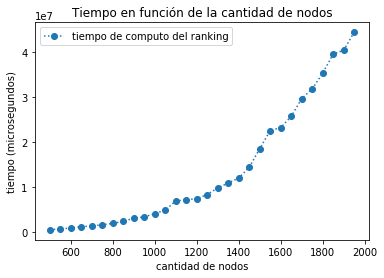

In [97]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(nodos, tiempos_nodos, marker='o', linestyle = ':', label = "tiempo de computo del ranking")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("cantidad de nodos")
plt.ylabel("tiempo (microsegundos)")
plt.title("Tiempo en función de la cantidad de nodos")
plt.legend(loc=2)
#plt.savefig("tiempo_nodos_prop_500-2000_solo_e10"+".png")
plt.show()

Normalizado

In [105]:
nodos_prima = nodos[0:len(tiempos)]
nodos_prima

[500,
 750,
 1000,
 1250,
 1500,
 1750,
 2000,
 2250,
 2500,
 2750,
 3000,
 3250,
 3500,
 3750,
 4000,
 4250,
 4500,
 4750]

In [66]:
100/(4/3)

75.0

In [5]:
(variables_nodos, tiempos_de_los_nodos) = readTiempos("tiempos-nodos.txt500-4750")
nodos_prima = variables_nodos
tiempos = tiempos_de_los_nodos

In [87]:
tiempos_nodos_normalizados = [x/(v*v) for (v,x) in zip(nodos, tiempos)] 

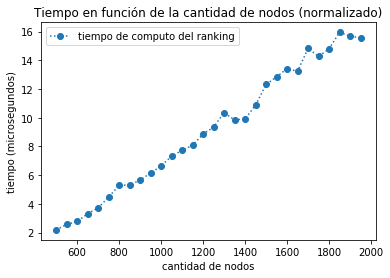

In [94]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(nodos, tiempos_nodos_normalizados, marker='o', linestyle = ':', label = "tiempo de computo del ranking")
#plt.plot([z/100-8 for z in range(500,2000)], label = "x/100 - 10")
plt.xlabel("cantidad de nodos")
plt.ylabel("tiempo (microsegundos)")
plt.title("Tiempo en función de la cantidad de nodos (normalizado)")
plt.legend(loc=2)
plt.savefig("tiempo_nodos_prop_500-2000-normalizado-e3"+".png")
plt.show()

## Variamos cantidad de ejes


In [3]:
ejecutable = '../src/tp1'
p = 0.85
file_input_ejes = 'cuantitativos/test-ejes'
file_tiempos_ejes = 'tiempos_ejes.txt'
file_output_ejes = file_input_ejes


In [31]:
nodos_fijo = 2000
cuantos_ejes = 25
ejes_init = 8000
distancia_ejes = 8000
repeticiones_ejes = 5

ejes = [ejes_init+distancia_ejes*x for x in range(0,cuantos_ejes+1)]

In [4]:
nodos_fijo = 1000
cuantos_ejes = 25
max_ejes = nodos_fijo*(nodos_fijo-1)

repeticiones_ejes = 5

ejes = [max_ejes*(x/cuantos_ejes) for x in range(1,cuantos_ejes)]

In [3]:
(variables, tiempos_variables) = readTiempos("tiempos_ejes.txt")
tiempos_variables

[6053976.2,
 4868473.0,
 4108631.6,
 4061610.6,
 4308217.4,
 4566597.0,
 5313834.2,
 6087787.4,
 6992379.4,
 7988177.4,
 9378221.6,
 11155389.6,
 12589309.0,
 14207340.8,
 15981314.0,
 17982905.2,
 20111068.6,
 24556771.0,
 27711709.8,
 31084098.2,
 35823863.8,
 40642125.8,
 43314076.6,
 44296814.4]

In [33]:
tiempos_ejes = []
for e in ejes:
    grafo = nx.gnm_random_graph(nodos_fijo, e, seed=597234279, directed=True)
    filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    #veo que no autoejes
    while True in filtrado:
        grafo = nx.gnm_random_graph(nodos_fijo, e, seed=1687980, directed=True)
        filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    
    nombre_archivo = file_input+'-'+str(len(grafo))+'-'+str(grafo.number_of_edges())+'.txt'
    writeGraph(grafo, nombre_archivo)
    
    tiempo_acum = 0.0
    for i in range(repeticiones_ejes):
11
        proceso = subprocess.Popen([ejecutable,nombre_archivo, str(p),'-t'],stdout=subprocess.PIPE)
        [output, error] = proceso.communicate()
        tiempo_acum = tiempo_acum + float(output)

    tiempo_acum = tiempo_acum/float(repeticiones_ejes)
    tiempos_ejes.append(tiempo_acum) 
   

In [33]:
with open(file_tiempos_ejes, 'w') as f:
    for e, t in zip(ejes, tiempos_ejes):
        f.write(str(e)+' '+str(t)+'\n')
tiempos_ejes

[6053976.2,
 4868473.0,
 4108631.6,
 4061610.6,
 4308217.4,
 4566597.0,
 5313834.2,
 6087787.4,
 6992379.4,
 7988177.4,
 9378221.6,
 11155389.6,
 12589309.0,
 14207340.8,
 15981314.0,
 17982905.2,
 20111068.6,
 24556771.0,
 27711709.8,
 31084098.2,
 35823863.8,
 40642125.8,
 43314076.6,
 44296814.4]

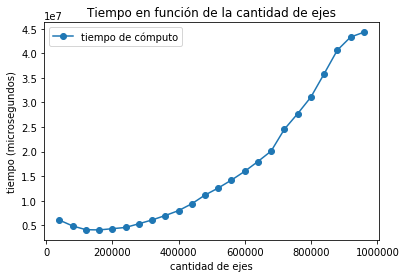

In [9]:
#tiempos_variables_prima = [x/(4000*v) for (v,x) in zip(variables[, tiempos_variables)]
plt.plot(variables, tiempos_variables, marker='o', label = "tiempo de cómputo")
#plt.plot([z*z/30000 for z in range(80000,1000000)], label = "f(x) = 45x" ) 
plt.xlabel("cantidad de ejes")
plt.ylabel("tiempo (microsegundos)")
plt.title("Tiempo en función de la cantidad de ejes")
plt.legend(loc=2)
#plt.savefig("tiempo_ejes"+ ".png")
plt.show()

Normalizado

In [7]:
tiempos_ejes_normalizados = [x/(v) for (v,x) in zip(variables, tiempos_variables)] 

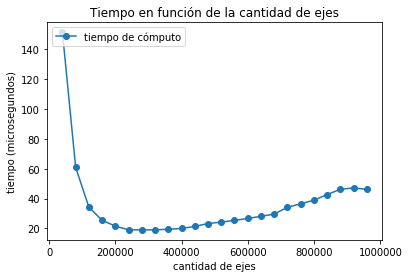

In [8]:
plt.plot(variables, tiempos_ejes_normalizados, marker='o', label = "tiempo de cómputo")
#plt.plot([z/10000-50 for z in range(80000,1000000)], label = "f(x) = 45x" ) 
plt.xlabel("cantidad de ejes")
plt.ylabel("tiempo (microsegundos)")
plt.title("Tiempo en función de la cantidad de ejes")
plt.legend(loc=2)
#plt.savefig("tiempo_ejes"+ ".png")
plt.show()

## Variando P

In [15]:
ejecutable = '../src/tp1'
#p = 0.85
file_input_p = 'cuantitativos/test-p'
file_tiempos_p = 'tiempos_p.txt'
file_output_p = file_input_p


In [16]:
nodos_p= 1000
ejes_p = 8000
repeticiones_p= 5

ps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9]

In [17]:
tiempos_p = []
for p in ps:
    grafo = nx.gnm_random_graph(nodos_p, ejes_p, seed=546412, directed=True)
    filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    #veo que no autoejes
    while True in filtrado:
        grafo = nx.gnm_random_graph(nodos_p, ejes_p, seed=546412, directed=True)
        filtrado = [(nodox == nodoy) for (nodox, nodoy) in grafo.edges()]
    
    nombre_archivo = file_input_p+'-p'+str(p)+'-'+str(len(grafo))+'-'+str(grafo.number_of_edges())+'.txt'
    writeGraph(grafo, nombre_archivo)
    
    tiempo_acum = 0.0
    for i in range(repeticiones_p):

        proceso = subprocess.Popen([ejecutable,nombre_archivo, str(p),'-t'],stdout=subprocess.PIPE)
        [output, error] = proceso.communicate()
        tiempo_acum = tiempo_acum + float(output)

    tiempo_acum = tiempo_acum/float(repeticiones_p)
    tiempos_p.append(tiempo_acum) 
   

In [19]:
with open(file_tiempos_p, 'w') as f:
    for e, t in zip(ejes, tiempos_p):
        f.write(str(e)+' '+str(t)+'\n')
tiempos_p

[549984.8,
 1519556.0,
 2076194.0,
 2270072.0,
 2419764.0,
 2532058.0,
 2599526.0,
 2637666.0,
 2814420.0,
 2897194.0]

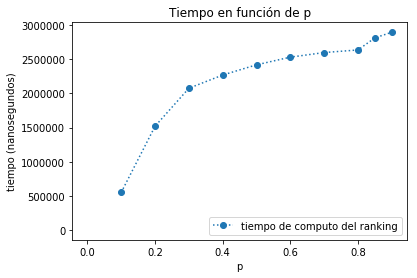

In [24]:
plt.plot(ps, tiempos_p, marker='o', linestyle = ':', label = "tiempo de computo del ranking")
plt.plot([np.sqrt(x) for x in range(0,1)])
plt.xlabel("p")
plt.ylabel("tiempo (microsegundos)")
plt.title("Tiempo en función de p")
plt.legend(loc=4)
#plt.savefig("tiempo_p"+".png")
plt.show()